<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/CheckLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Hemodialysis.csv', encoding='latin1')

In [3]:
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

In [4]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from lab['PatientUID'] that are not in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [5]:
lab0 = pd.DataFrame(lab)

In [6]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

LabSummaryDF = pd.DataFrame(lab_count)

# **Slope**


> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**




In [7]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/Slope.xlsx')

In [8]:
data = pd.DataFrame(slope)
data = data[['PatientUID','PatientVisitUID','Slopes']]

df = pd.DataFrame(data)

# Sorting the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(['PatientUID', 'PatientVisitUID'])

# Adding a NextSlope column
df['Slopes'] = df.groupby('PatientUID')['Slopes'].shift(-1)

data = df.dropna()
data

,PatientUID,PatientVisitUID,Slopes
0,2299,3386255,-7.158596
1,2299,4546471,5.550691
2,2299,5812902,-6.063710
3,2299,6947220,-12.812245
4,2299,8186767,28.287500
...,...,...,...
73378,3319961,9270330,-4.256753
73380,3319971,9270331,-0.692078
73382,3320048,9242721,7.217875
73384,3320050,9257281,-32.794557


# **LabList**


> **Replace Item with List then create new table to store the value**




In [9]:
lab = pd.DataFrame(lab0) ##run from this cell if u want to rerun

In [11]:
# Define the mapping of LabSummaryDF indices to lab result DataFrames
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}

In [12]:
# Create new columns for labels
lab['LabelResult'] = ""
lab['LabelRequest'] = ""

# Iterate through the lab_mapping dictionary and update 'LabelResult' and 'LabelRequest' columns
for lab_name, indices in lab_mapping.items():
    result_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['ResultItemName'].tolist()
    request_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['RequestItemName'].tolist()
    lab.loc[lab['ResultItemName'].isin(result_item_names), 'LabelResult'] = lab_name
    lab.loc[lab['RequestItemName'].isin(request_item_names), 'LabelRequest'] = lab_name

In [13]:
lab = lab[['LabNo','PatientUID', 'PatientVisitUID','CWhen','ResultItemName','RequestItemName','ResultValue', 'LabelResult', 'LabelRequest']]

## **Define**

**กรณีคล้าย FileMedical**

```
มันจะมี rows ที่ mapping value ไม่ตรงกัน เช่น
```
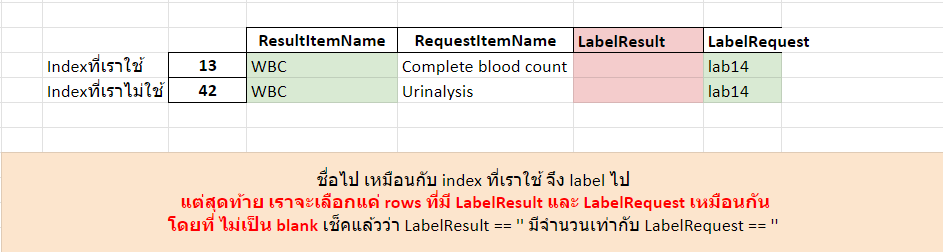


#### **Re-Check Mapping**

In [14]:
lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab3'), 'LabelRequest'] = 'lab1' #L1:eGFR
lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab12' #L12:Hemoglobin
lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab13' #L13:HCT
lab0.loc[(lab0['LabelResult'] == 'lab14') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab14' #L14:WBC

In [15]:
#lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab1')] #remap >> 435224
#lab0.loc[(lab0['LabelResult'] == 'lab2') & (lab0['LabelRequest'] == 'lab2')] #checked >> 412742
#lab0.loc[(lab0['LabelResult'] == 'lab3') & (lab0['LabelRequest'] == 'lab3')] #checked >> 492979
#lab0.loc[(lab0['LabelResult'] == 'lab4') & (lab0['LabelRequest'] == 'lab4')] #checked >> 405920
#lab0.loc[(lab0['LabelResult'] == 'lab5') & (lab0['LabelRequest'] == 'lab5')] #checked >> 419305
#lab0.loc[(lab0['LabelResult'] == 'lab6') & (lab0['LabelRequest'] == 'lab6')] #checked >> 405185
#lab0.loc[(lab0['LabelResult'] == 'lab7') & (lab0['LabelRequest'] == 'lab7')] #checked >> 406077
#lab0.loc[(lab0['LabelResult'] == 'lab8') & (lab0['LabelRequest'] == 'lab8')] #checked >> 89115
#lab0.loc[(lab0['LabelResult'] == 'lab9') & (lab0['LabelRequest'] == 'lab9')] #checked >> 179602
#lab0.loc[(lab0['LabelResult'] == 'lab10') & (lab0['LabelRequest'] == 'lab10')] #checked >> 178485
#lab0.loc[(lab0['LabelResult'] == 'lab11') & (lab0['LabelRequest'] == 'lab11')] #checked >> 267516
#lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] == 'lab12')] #remap >> Hb 248268
#lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] == 'lab13')] #remap >> HCT 348514 rows
#lab14 >> 315233
#lab0.loc[(lab0['LabelResult'] == 'lab15') & (lab0['LabelRequest'] == 'lab15')] #checked >> 315226 rows
#lab0.loc[(lab0['LabelResult'] == 'lab16') & (lab0['LabelRequest'] == 'lab16')] #checked >> 10055 rows
#lab0.loc[(lab0['LabelResult'] == 'lab17') & (lab0['LabelRequest'] == 'lab17')] #checked >> 8860 rows
#lab0.loc[(lab0['LabelResult'] == 'lab18') & (lab0['LabelRequest'] != 'lab18')] checked >> 10974 rows
#lab0.loc[(lab0['LabelResult'] == 'lab19') & (lab0['LabelRequest'] != 'lab19')] checked >> 197363 rows
#lab0.loc[(lab0['LabelResult'] == 'lab20') & (lab0['LabelRequest'] != 'lab20')] checked >> 157990  rows
#lab0.loc[(lab0['LabelResult'] == 'lab21') & (lab0['LabelRequest'] != 'lab21')] checked >> 261543 rows
#lab0.loc[(lab0['LabelResult'] == 'lab22') & (lab0['LabelRequest'] != 'lab22')] checked >> 161410 rows
#lab0.loc[(lab0['LabelResult'] == 'lab23') & (lab0['LabelRequest'] != 'lab23')] checked >> 181613 rows
#lab0.loc[(lab0['LabelResult'] == 'lab24') & (lab0['LabelRequest'] != 'lab24')] checked >> 158028 rows
#lab0.loc[(lab0['LabelResult'] == 'lab25') & (lab0['LabelRequest'] != 'lab25')] checked >> 6090 rows
#lab0.loc[(lab0['LabelResult'] == 'lab26') & (lab0['LabelRequest'] != 'lab26')] checked >> 8813 rows
#lab0.loc[(lab0['LabelResult'] == 'lab27') & (lab0['LabelRequest'] != 'lab27')] checked >> 9406  rows
#lab 28 >> 70044
#lab0.loc[(lab0['LabelResult'] == 'lab29') & (lab0['LabelRequest'] != 'lab29')] checked >> 24 hr urine volume >> 7424 rows
#lab0.loc[(lab0['LabelResult'] == 'lab30') & (lab0['LabelRequest'] != 'lab30')] checked >> 24 hr urine urea >> 4191 rows
#lab0.loc[(lab0['LabelResult'] == 'lab31') & (lab0['LabelRequest'] != 'lab31')] #checked >> 24 hr urine sodium >> 3338 rows
#lab0.loc[(lab0['LabelResult'] == 'lab32') & (lab0['LabelRequest'] == 'lab32')].shape #checked >> 24 hr urine protein >> 7570 rows

In [16]:
#ค่าพวกนี้เป็นค่าที่ไม่ตรงกับ index ที่หมอกำหนด ก็เลยไม่ได้ใช้ในตอนแรก 5551493  rows
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab3')] >> FileLab 1087
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab13')] >> BloodGas(POCT)
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab15')] >> Complete blood count
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab17')] >> FileLab 586
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab18')] >> FileLab 1835
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab26')] >> FileLab 1120
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab27')] >> FileLab 2111
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab29')] >> FileLab 2100

`ทำต่อเหมือนเดิม โดยหลังจากแก้ไขค่าที่ map ไม่ตรงแล้ว เลือกคอลัมน์ที่ค่าที่ map จาก focus column ตรงกันทั้ง 2 คอลัมน์ มาใช้`

In [17]:
lab0 = lab0[(lab0['LabelResult'] != '') & (lab0['LabelRequest'] != '')]

In [18]:
lab = lab0[(lab0['LabelResult'] == lab0['LabelRequest'])]

In [26]:
lab.shape

(6184103, 13)

# **WideTableLab**


In [24]:
visitid = data['PatientVisitUID'].unique().tolist()
selected = lab[lab['PatientVisitUID'].isin(visitid)]

In [25]:
selected

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest
245,1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BUN,"BUN, 32201",2559-08-15 09:51:55.057,NaN,18.5,mg/dL,5.8 - 19.1,lab2,lab2
246,1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHOLESTEROL,"CHOLESTEROL, 32501",2559-08-15 09:51:55.123,NaN,215,mg/dL,127 - 262,lab21,lab21
247,1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,"CREATININE, 32202",2559-08-15 09:51:54.913,NaN,0.8,mg/dL,0.5 - 1.5,lab3,lab3
248,1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2559-08-15 09:51:54.913,NaN,71.7,ml/min/1.73m2,-,lab1,lab1
249,1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,HDL-C,"HDL-C, 32503",2559-08-15 09:51:55.293,NaN,99,mg/dL,> 35,lab24,lab24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21627888,158,1553938,3335765,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,POTASSIUM,"POTASSIUM, 32103",2560-01-23 07:17:02.283,NaN,3.7,mEq/L,3.4 - 4.7,lab5,lab5
21627889,158,1553938,3335765,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,SODIUM,"SODIUM, 32102",2560-01-23 07:17:02.203,NaN,141,mEq/L,130 - 147,lab4,lab4
21628141,159,1553938,3335765,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHLORIDE,"CHLORIDE, 32104",2560-01-28 07:57:25.183,NaN,104,mEq/L,96 - 107,lab6,lab6
21628142,159,1553938,3335765,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,POTASSIUM,"POTASSIUM, 32103",2560-01-28 07:57:25.090,NaN,3.6,mEq/L,3.4 - 4.7,lab5,lab5


In [27]:
selected['LabelResult'].unique()

array(['lab2', 'lab21', 'lab3', 'lab1', 'lab24', 'lab23', 'lab19',
       'lab22', 'lab8', 'lab7', 'lab6', 'lab20', 'lab5', 'lab4', 'lab12',
       'lab13', 'lab15', 'lab14', 'lab11', 'lab28', 'lab27', 'lab25',
       'lab26', 'lab9', 'lab10', 'lab30', 'lab29', 'lab18', 'lab16',
       'lab17', 'lab32', 'lab31'], dtype=object)

In [58]:
value = ['lab1', 'lab2', 'lab3', 'lab4', 'lab5', 'lab6', 'lab7','lab8', 'lab9', 'lab10',
         'lab11', 'lab12','lab13', 'lab14', 'lab15', 'lab16', 'lab17', 'lab18', 'lab19', 'lab20',
         'lab21', 'lab22', 'lab23', 'lab24', 'lab25','lab26', 'lab27','lab28', 'lab29','lab30',
         'lab31', 'lab32']
filtered = selected[selected['LabelResult'].isin(value)]
grouped_check = filtered.groupby(['PatientUID', 'PatientVisitUID','Location', 'ResultItemName','RequestItemName','LabelResult','LabelRequest']).agg({'ResultValue': 'last'}).reset_index()
grouped_check

,PatientUID,PatientVisitUID,Location,ResultItemName,RequestItemName,LabelResult,LabelRequest,ResultValue
0,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,lab2,lab2,18.5
1,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501",CHOLESTEROL,lab21,lab21,215
2,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202",CREATININE,lab3,lab3,0.8
3,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"HDL-C, 32503",HDL-C,lab24,lab24,99
4,2299,3386255,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"LDL-CHOL (DIRECT), 32504",LDL-CHOL (DIRECT),lab23,lab23,123
...,...,...,...,...,...,...,...,...
639783,3321289,9274735,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501",CHOLESTEROL,lab21,lab21,165
639784,3321289,9274735,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202",CREATININE,lab3,lab3,0.54
639785,3321289,9274735,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"POTASSIUM, 32103",POTASSIUM,lab5,lab5,4.3
639786,3321289,9274735,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"SODIUM, 32102",SODIUM,lab4,lab4,130


In [59]:
pivoted_table = grouped_check.pivot_table(index=['PatientUID', 'PatientVisitUID'], columns='LabelResult', values='ResultValue', aggfunc='last')
pivoted_table.reset_index(inplace=True)

In [60]:
grouped_check[grouped_check['PatientVisitUID']==4916314]

,PatientUID,PatientVisitUID,Location,ResultItemName,RequestItemName,LabelResult,LabelRequest,ResultValue
67,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,lab2,lab2,20.8
68,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501",CHOLESTEROL,lab21,lab21,143
69,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202",CREATININE,lab3,lab3,1.08
70,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"HB A1C, 32401",HB A1C,lab20,lab20,6.2
71,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"HDL-C, 32503",HDL-C,lab24,lab24,51
72,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"LDL-CHOL (DIRECT), 32504",LDL-CHOL (DIRECT),lab23,lab23,89
73,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"SUGAR IN NAF-PLASMA, 32203",SUGAR IN NAF-PLASMA,lab19,lab19,111
74,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"TRIGLYCERIDE, 32502",TRIGLYCERIDE,lab22,lab22,97
75,2304,4916314,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,eGFR(CKD-EPI) age >=18,CREATININE,lab1,lab1,57.10


In [61]:
result_table = pd.merge(data, pivoted_table, on=['PatientUID', 'PatientVisitUID'], how='left')
result_table

,PatientUID,PatientVisitUID,Slopes,lab1,lab10,lab11,lab12,lab13,lab14,lab15,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,2299,3386255,-7.158596,71.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299,4546471,5.550691,63.60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN
2,2299,5812902,-6.063710,70.20,NaN,NaN,10.1,32.4,9.41,313,...,0.82,NaN,NaN,NaN,143,3.8,103,29.7,NaN,NaN
3,2299,6947220,-12.812245,64.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.88,NaN,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
4,2299,8186767,28.287500,48.54,NaN,NaN,10.7,34.6,5.42,434,...,1.10,NaN,NaN,NaN,141,4.4,102,27.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,38.17,3.9,5.0,NaN,42.1,10.32,306,...,1.85,NaN,NaN,NaN,142,4.2,101,24.1,NaN,9.8
52616,3319971,9270331,-0.692078,27.20,4.3,4.3,NaN,40.6,9.56,361,...,1.85,NaN,NaN,NaN,142,4.4,103,23.7,NaN,9.2
52617,3320048,9242721,7.217875,62.45,3.4,3.1,NaN,35,4.61,131,...,1.21,NaN,NaN,NaN,132,4.3,101,18.8,NaN,8.5
52618,3320050,9257281,-32.794557,66.18,NaN,NaN,NaN,39.0,9.44,305,...,1.14,NaN,NaN,NaN,138,4.9,101,25.6,NaN,NaN


In [62]:
result_table.isnull().sum()

PatientUID             0
PatientVisitUID        0
Slopes                 0
lab1                   0
lab10              40778
lab11              29908
lab12              23610
lab13              22308
lab14              22312
lab15              22312
lab16              51732
lab17              51845
lab18              51643
lab19              23300
lab2               12839
lab20              27983
lab21              18971
lab22              26203
lab23              23395
lab24              26625
lab25              51723
lab26              51348
lab27              51269
lab28              47134
lab29              51919
lab3                   0
lab30              52223
lab31              52336
lab32              51957
lab4               21278
lab5               19012
lab6               21359
lab7               21199
lab8               38898
lab9               40443
dtype: int64

In [63]:
result_table[result_table.duplicated(subset=['PatientVisitUID'], keep=False)]

,PatientUID,PatientVisitUID,Slopes,lab1,lab10,lab11,lab12,lab13,lab14,lab15,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9


In [64]:
result_table[result_table['PatientVisitUID']==2705230][['lab1',
       'lab10', 'lab11', 'lab12', 'lab13', 'lab14', 'lab15', 'lab16', 'lab17',
       'lab18', 'lab19', 'lab2', 'lab20', 'lab21', 'lab22', 'lab23', 'lab24',
       'lab25', 'lab26', 'lab27', 'lab28', 'lab29', 'lab3', 'lab30', 'lab31',
       'lab32', 'lab4', 'lab5', 'lab6', 'lab7', 'lab8', 'lab9']]

,lab1,lab10,lab11,lab12,lab13,lab14,lab15,lab16,lab17,lab18,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
7189,41.9,3.6,3.8,10.8,34.5,4.28,142,NaN,NaN,NaN,...,1.2,9.1,NaN,165,141,3.5,106,20.7,2.4,8.8


In [65]:
grouped_check[grouped_check['PatientVisitUID']==2705230]

,PatientUID,PatientVisitUID,Location,ResultItemName,RequestItemName,LabelResult,LabelRequest,ResultValue
86093,136689,2705230,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,HCT,Complete blood count,lab13,lab13,34.5
86094,136689,2705230,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Hb,Complete blood count,lab12,lab12,10.8
86095,136689,2705230,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,PLT,Complete blood count,lab15,lab15,142
86096,136689,2705230,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,WBC,Complete blood count,lab14,lab14,4.28
86097,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403",ALBUMIN,lab11,lab11,3.8
86098,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BICARBONATE, 32105",BICARBONATE,lab7,lab7,20.7
86099,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,lab2,lab2,23.7
86100,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CALCIUM, 32106",CALCIUM,lab9,lab9,8.8
86101,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHLORIDE, 32104",CHLORIDE,lab6,lab6,106
86102,136689,2705230,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501",CHOLESTEROL,lab21,lab21,120


### **Check**

In [68]:
location = grouped_check['Location'].value_counts().reset_index()
location.columns = ['Location', 'Location_Count']

lab_result1 = grouped_check['ResultItemName'].value_counts().reset_index()
lab_result1.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request1 = grouped_check['RequestItemName'].value_counts().reset_index()
lab_request1.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count1 = ['Location', 'ResultItemName', 'RequestItemName']

lab_count1 = grouped_check[columns_to_count].value_counts().reset_index()
lab_count1.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

CountDF = pd.DataFrame(lab_count1)

In [98]:
filtered_rows = grouped_check[
    (grouped_check['ResultItemName'] == 'Transferin saturated(%)') &
    (~pd.to_numeric(grouped_check['ResultValue'], errors='coerce').notna())]
filtered_rows

,PatientUID,PatientVisitUID,Location,ResultItemName,RequestItemName,LabelResult,LabelRequest,ResultValue
181280,414362,8553425,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Transferin saturated(%),Transferin saturated(%),lab17,lab17,No cal
301869,826550,9231788,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Transferin saturated(%),Transferin saturated(%),lab17,lab17,> 87.3
401048,1111261,8883865,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Transferin saturated(%),Transferin saturated(%),lab17,lab17,>85.1
439057,1218697,8813145,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Transferin saturated(%),Transferin saturated(%),lab17,lab17,No Cal
512125,1543578,6966819,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Transferin saturated(%),%Transferin saturated,lab17,lab17,No cal
583181,2372901,6970105,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Transferin saturated(%),%Transferin saturated,lab17,lab17,No cal


In [114]:
filtered_rows = grouped_check[
    (grouped_check['LabelResult'] == 'lab13') &
    (~pd.to_numeric(grouped_check['ResultValue'], errors='coerce').notna())]
filtered_rows

,PatientUID,PatientVisitUID,Location,ResultItemName,RequestItemName,LabelResult,LabelRequest,ResultValue
160548,316795,6646802,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,HCT,Complete blood count,lab13,lab13,-
252160,672527,6746396,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,HCT,Complete blood count,lab13,lab13,-


####**Lab13**
```
#31467 คือ จำนวนแถวที่ มีค่า lab13 ทั้งหมด แต่คนไข้มารับการรักษาในครั้งเดียวกันซ้ำกัน 1155
เราจะเลือกแค่ค่าที่เป็นค่าล่าสุด นั่นเลยทำให้ 31467-30312= 1155
>> 31467-1155 == 30312 >> ค่าสูญหายที่แท้จริง
```

In [124]:
lab13 = grouped_check[grouped_check['LabelResult']=='lab13']
lab13.shape

(31467, 8)

In [117]:
lab13['PatientVisitUID'].nunique() #visitid ที่ไม่ซ้ำ มีแค่ 30312

30312

In [118]:
result_table['lab13'].isnull().sum() #22308 + 30312 = 52620

22308

####**Lab17**


```
777 - 2 == 775 >> ค่าสูญหายที่แท้จริง
```



In [120]:
lab17 = grouped_check[grouped_check['LabelResult']=='lab17']
lab17.shape

(777, 8)

In [123]:
lab17['PatientVisitUID'].nunique() #visitid ที่ไม่ซ้ำมีแค่ 775

775

In [121]:
result_table['lab17'].isnull().sum()

51845

####**Lab19**


```
countunique = 29498 - 178 == 29320 >> ค่าสูญหายที่แท้จริง
>> 29320 + 23300 == 52620
```




In [127]:
lab19 = grouped_check[grouped_check['LabelResult']=='lab19']
lab19.shape

(29498, 8)

In [139]:
lab19['PatientVisitUID'].nunique() #visitid ที่ไม่ซ้ำมีแค่ 29320

29320

In [130]:
result_table['lab19'].isnull().sum()

23300

####**Lab25**


```
countunique = 902 - 5 == 897 >> ค่าสูญหายที่แท้จริง
>> 897 + 51723 == 52620
```

In [137]:
lab25 = grouped_check[grouped_check['LabelResult']=='lab25']
lab25.shape

(902, 8)

In [140]:
lab25['PatientVisitUID'].nunique() #visitid ที่ไม่ซ้ำมีแค่ 897

897

In [141]:
result_table['lab25'].isnull().sum()

51723

####**Lab26**


```
countunique = 1274 - 2 == 1272 >> ค่าสูญหายที่แท้จริง
>> 1272 + 51348 == 52620
```

In [143]:
lab26 = grouped_check[grouped_check['LabelResult']=='lab26']
lab26.shape

(1274, 8)

In [145]:
lab26['PatientVisitUID'].nunique() #visitid ที่ไม่ซ้ำมีแค่ 1272

1272

In [146]:
result_table['lab26'].isnull().sum()

51348

####**Lab28**


```
countunique = 7954 - 2468 == 5486 >> ค่าสูญหายที่แท้จริง
>> 5486 + 47134 == 52620
```

In [149]:
lab28 = grouped_check[grouped_check['LabelResult']=='lab28']
lab28.shape

(7954, 8)

In [151]:
lab28['PatientVisitUID'].nunique() #visitid ที่ไม่ซ้ำมีแค่ 5486

5486

In [152]:
result_table['lab28'].isnull().sum()

47134

##**New_CountUniqueTable**

In [122]:
result_table.shape

(52620, 35)

In [82]:
result_table.isnull().sum()

PatientUID             0
PatientVisitUID        0
Slopes                 0
lab1                   0
lab10              40778
lab11              29908
lab12              23610
lab13              22308
lab14              22312
lab15              22312
lab16              51732
lab17              51845
lab18              51643
lab19              23300
lab2               12839
lab20              27983
lab21              18971
lab22              26203
lab23              23395
lab24              26625
lab25              51723
lab26              51348
lab27              51269
lab28              47134
lab29              51919
lab3                   0
lab30              52223
lab31              52336
lab32              51957
lab4               21278
lab5               19012
lab6               21359
lab7               21199
lab8               38898
lab9               40443
dtype: int64

In [72]:
CountDF

,Location,ResultItemName,RequestItemName,Count
0,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,eGFR(CKD-EPI) age >=18,CREATININE,52607
1,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202",CREATININE,52607
2,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,39771
3,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501",CHOLESTEROL,33642
4,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"POTASSIUM, 32103",POTASSIUM,33603
5,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BICARBONATE, 32105",BICARBONATE,31416
6,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"SODIUM, 32102",SODIUM,31337
7,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHLORIDE, 32104",CHLORIDE,31256
8,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,HCT,Complete blood count,30308
9,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,PLT,Complete blood count,30308


In [162]:
labDF = result_table[['PatientUID','PatientVisitUID','Slopes','lab1','lab2', 'lab3',
                      'lab4', 'lab5', 'lab6', 'lab7', 'lab8', 'lab9', 'lab10', 'lab11',
                      'lab12', 'lab13', 'lab14', 'lab15', 'lab16', 'lab17', 'lab18',
                      'lab19', 'lab20', 'lab21', 'lab22', 'lab23', 'lab24', 'lab25', 'lab26',
                      'lab27', 'lab28', 'lab29', 'lab30', 'lab31', 'lab32']]
# Drop rows with missing values in 'PatientUID', 'PatientVisitUID', and 'Slopes'
#labDF = labDF.dropna(subset=['PatientUID', 'PatientVisitUID', 'Slopes'])

## **Rename Columns**

In [163]:
# Create a dictionary for renaming columns
column_rename_dict = {
    'lab1': 'L1:eGFR',
    'lab2': 'L2:BUN',
    'lab3': 'L3:Creatinine',
    'lab4': 'L4:Sodium',
    'lab5': 'L5:Potassium',
    'lab6': 'L6:Chloride',
    'lab7': 'L7:Bicarbonate',
    'lab8': 'L8:Uric',
    'lab9': 'L9:Calcium',
    'lab10': 'L10:Phosphorus',
    'lab11': 'L11:Albumin',
    'lab12': 'L12:Hemoglobin',
    'lab13': 'L13:Hematocrit',
    'lab14': 'L14:WBC',
    'lab15': 'L15:Platelet',
    'lab16': 'L16:TIBC',
    'lab17': 'L17:Tranferin SAT',
    'lab18': 'L18:Ferritin',
    'lab19': 'L19:Blood sugar',
    'lab20': 'L20:HbA1c',
    'lab21': 'L21:Cholesterol',
    'lab22': 'L22:Triglyceride',
    'lab23': 'L23:LDL Cholesterol',
    'lab24': 'L24:HDL Cholesterol',
    'lab25': 'L25:Parathyroid hormone',
    'lab26': 'L26:Vitamin D',
    'lab27': 'L27:UrineAlbumin/Cr ratio',
    'lab28': 'L28:UrineProtein/Cr ratio',
    'lab29': 'L29:UrineVolume (24hrs)',
    'lab30': 'L30:UrineUrea (24hrs)',
    'lab31': 'L31:UrineSodium (24hrs)',
    'lab32': 'L32:UrineProtein (24hrs)'
}
# Use the rename method to rename the columns
labDF.rename(columns=column_rename_dict, inplace=True)
labDF

,PatientUID,PatientVisitUID,Slopes,L1:eGFR,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,2299,3386255,-7.158596,71.7,18.5,0.8,NaN,NaN,NaN,NaN,...,123,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299,4546471,5.550691,63.60,13.0,0.90,NaN,NaN,NaN,NaN,...,146,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299,5812902,-6.063710,70.20,6.5,0.82,143,3.8,103,29.7,...,129,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,6947220,-12.812245,64.02,NaN,0.88,NaN,4.3,NaN,NaN,...,139,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299,8186767,28.287500,48.54,14.5,1.10,141,4.4,102,27.2,...,129,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,38.17,20.8,1.85,142,4.2,101,24.1,...,84,43,NaN,NaN,12.11,131.3,NaN,NaN,NaN,NaN
52616,3319971,9270331,-0.692078,27.20,25.6,1.85,142,4.4,103,23.7,...,83,42,NaN,NaN,9.15,325.8,NaN,NaN,NaN,NaN
52617,3320048,9242721,7.217875,62.45,31.4,1.21,132,4.3,101,18.8,...,64,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,3320050,9257281,-32.794557,66.18,22.9,1.14,138,4.9,101,25.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
labDF = labDF.sort_values(by=["PatientUID", "PatientVisitUID"])

> **Check dup**

In [165]:
# Check for duplicate rows in data
duplicates_data = data[data.duplicated(['PatientUID', 'PatientVisitUID'], keep=False)]

# Check for duplicate rows in vitalDF
duplicates_vitalDF = labDF[labDF.duplicated(['PatientUID', 'PatientVisitUID', 'Slopes'], keep=False)]


In [166]:
duplicates_vitalDF

,PatientUID,PatientVisitUID,Slopes,L1:eGFR,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)


In [167]:
labDF

,PatientUID,PatientVisitUID,Slopes,L1:eGFR,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,2299,3386255,-7.158596,71.7,18.5,0.8,NaN,NaN,NaN,NaN,...,123,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2299,4546471,5.550691,63.60,13.0,0.90,NaN,NaN,NaN,NaN,...,146,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299,5812902,-6.063710,70.20,6.5,0.82,143,3.8,103,29.7,...,129,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2299,6947220,-12.812245,64.02,NaN,0.88,NaN,4.3,NaN,NaN,...,139,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299,8186767,28.287500,48.54,14.5,1.10,141,4.4,102,27.2,...,129,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,38.17,20.8,1.85,142,4.2,101,24.1,...,84,43,NaN,NaN,12.11,131.3,NaN,NaN,NaN,NaN
52616,3319971,9270331,-0.692078,27.20,25.6,1.85,142,4.4,103,23.7,...,83,42,NaN,NaN,9.15,325.8,NaN,NaN,NaN,NaN
52617,3320048,9242721,7.217875,62.45,31.4,1.21,132,4.3,101,18.8,...,64,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,3320050,9257281,-32.794557,66.18,22.9,1.14,138,4.9,101,25.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
labDF.to_excel('LabDF.xlsx')